# A. Data Preparation and Cleaning

In this notebook we will attempt to work on the sample data analytics problem offered by Abhishek Agarrwal about Singapore Residents Data. Link to his Youtube content for this problem https://www.youtube.com/watch?v=xArNPFG_nq0&t=193s

### Essential Libraries
First and foremost is importing the relevant libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib and Seaborn : Library for Data Visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Load in the csv file 'singapore-residents data.csv'

In [2]:
raw = pd.read_csv('singapore-residents data.csv')
raw.head()

,year,level_1,value
0,1960,Total Residents,1646400
1,1960,Total Male Residents,859600
2,1960,Total Female Residents,786800
3,1960,Total Malays,232200
4,1960,Total Male Malays,121000


Take a look at the dataset. `Year` is one variable indicating a potential time-series analysis. Other `variables` are number of population based on gender and race.

Do note that there are several unimportant variables such as `Total Residents`, `Total Male Residents`, `Total Malays`, so on and so forth. The reason behind removing them is because we can simply obtain these values from the remaining `Gender-Race` variables.

Also check the size and data types of the dataframe.

In [3]:
raw.shape

(885, 3)

In [4]:
raw.dtypes

year        int64
level_1    object
value       int64
dtype: object

### Performing Data Re-structuring

Our two objectives are:
1. Removing irrelevant variables from `level_1` column
2. Creating a list of values for every remaining variables from `level_1` column

In [5]:
removed_var = ['Total Residents','Total Male Residents','Total Female Residents','Total Malays','Total Chinese', \
              'Total Indians','Other Ethnic Groups (Total)']

raw_1 = raw[~raw.level_1.isin(removed_var)] #Use DataFrame slicing, '~' means NOT
raw_1.head() #always good to save the edited dataframe under different variable, provided dataframe does not take a lot of memory.

,year,level_1,value
4,1960,Total Male Malays,121000
5,1960,Total Female Malays,111200
7,1960,Total Male Chinese,636000
8,1960,Total Female Chinese,615600
10,1960,Total Male Indians,88000


In [6]:
var_year = raw.year.unique()

new_list = []
for year in var_year:
    new_list.append([year] + list(raw_1[raw_1.year == year].value))

column_name = ['Year','M-Malay','F-Malay','M-Chinese','F-Chinese','M-Indians','F-Indians','M-Other','F-Other']

Our next objectives will be making a new dataframe from the lists above. Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [7]:
df = pd.DataFrame(new_list,columns=column_name)
df.head()

,Year,M-Malay,F-Malay,M-Chinese,F-Chinese,M-Indians,F-Indians,M-Other,F-Other
0,1960,121000,111200,636000,615600,88000,45200,14600,14800
1,1961,125700,116800,657600,637400,88800,46900,14400,14800
2,1962,129300,121000,676500,656500,89000,48100,14700,15100
3,1963,132000,125200,694200,675100,87900,49500,15200,15900
4,1964,136700,130300,712300,693200,87400,51000,15100,15600


Set variable `Year` as index.

In [8]:
df.set_index('Year', inplace=True)

In [9]:
df.head()

,M-Malay,F-Malay,M-Chinese,F-Chinese,M-Indians,F-Indians,M-Other,F-Other
Year,,,,,,,,
1960,121000,111200,636000,615600,88000,45200,14600,14800
1961,125700,116800,657600,637400,88800,46900,14400,14800
1962,129300,121000,676500,656500,89000,48100,14700,15100
1963,132000,125200,694200,675100,87900,49500,15200,15900
1964,136700,130300,712300,693200,87400,51000,15100,15600


This restructured data frame is what the question wants. But, we can further restructure this dataframe by making columns `Gender`, `Ethnicity`, and `Population`.

Notice that the indexings were mixed up after we removed some of the rows earlier.

In [10]:
raw_2 = raw_1.copy()
raw_2.reset_index(drop=True,inplace=True)
raw_2[:10]

,year,level_1,value
0,1960,Total Male Malays,121000
1,1960,Total Female Malays,111200
2,1960,Total Male Chinese,636000
3,1960,Total Female Chinese,615600
4,1960,Total Male Indians,88000
5,1960,Total Female Indians,45200
6,1960,Other Ethnic Groups (Males),14600
7,1960,Other Ethnic Groups (Females),14800
8,1961,Total Male Malays,125700
9,1961,Total Female Malays,116800


We need to create the two new columns `ethnic` and `gender`.

In [11]:
raw_2["ethnic"] = raw_2['level_1'].map(lambda x: "Others" if x.find("Other") != -1 else x.split()[2])
raw_2["gender"] = raw_2['level_1'].map(lambda x: "Male" if x.find("Male") != -1 else "Female")

raw_2[:10]

,year,level_1,value,ethnic,gender
0,1960,Total Male Malays,121000,Malays,Male
1,1960,Total Female Malays,111200,Malays,Female
2,1960,Total Male Chinese,636000,Chinese,Male
3,1960,Total Female Chinese,615600,Chinese,Female
4,1960,Total Male Indians,88000,Indians,Male
5,1960,Total Female Indians,45200,Indians,Female
6,1960,Other Ethnic Groups (Males),14600,Others,Male
7,1960,Other Ethnic Groups (Females),14800,Others,Female
8,1961,Total Male Malays,125700,Malays,Male
9,1961,Total Female Malays,116800,Malays,Female


We then need to drop `level_1` and shift column `value` to the end.

In [12]:
#dropping column
raw_2.drop(['level_1'], axis=1,inplace=True)

#switching column position
col_list = list(raw_2)
col_list[3],col_list[1] = col_list[1],col_list[3]
raw_2 = raw_2.reindex(columns = col_list)
raw_2[:10]

,year,gender,ethnic,value
0,1960,Male,Malays,121000
1,1960,Female,Malays,111200
2,1960,Male,Chinese,636000
3,1960,Female,Chinese,615600
4,1960,Male,Indians,88000
5,1960,Female,Indians,45200
6,1960,Male,Others,14600
7,1960,Female,Others,14800
8,1961,Male,Malays,125700
9,1961,Female,Malays,116800


In [13]:
df_2 = raw_2.copy()
# df_2.set_index('year',inplace=True)

Data look much neater. To analyze this dataframe, we need to use **groupby** unlike the previous dataframe `df`.

# B. Data Analysis

### 1. At what rate does singapore population is increasing?

For this question we might need to plot the historical population trend using matplotlib or seaborn.

In [14]:
#Since the question asked for singapore total population, I was confused why Abhisek asked me to remove that variable.
# We are going to sum every columns back to get the total poopulation column

df["Total"] = 0 #Initialize this column with zeros

for column_name in df.columns[:-1]:
    df["Total"] = df["Total"] + df[column_name]

df.head()

,M-Malay,F-Malay,M-Chinese,F-Chinese,M-Indians,F-Indians,M-Other,F-Other,Total
Year,,,,,,,,,
1960,121000,111200,636000,615600,88000,45200,14600,14800,1646400
1961,125700,116800,657600,637400,88800,46900,14400,14800,1702400
1962,129300,121000,676500,656500,89000,48100,14700,15100,1750200
1963,132000,125200,694200,675100,87900,49500,15200,15900,1795000
1964,136700,130300,712300,693200,87400,51000,15100,15600,1841600


Do note that the Matplotlib code below still not fully refined. For the purpose of basic visualization, we don't really emphasize on stylings of the graph. We can also use tableau for better visualization.

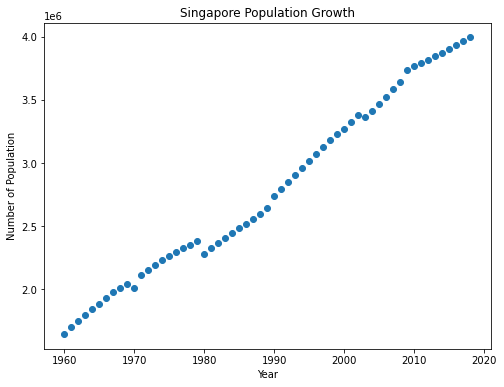

In [15]:
f, ax = plt.subplots(figsize=(8,6))
plt.scatter(df.index,df["Total"])
ax.set_title('Singapore Population Growth')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Population")
plt.show()

# #add gridlines
# from matplotlib.ticker import MultipleLocator

# ax.grid()
# spacing = 2 #every year
# minorLocator_1 = MultipleLocator(spacing)
# minorLocator_2 = MultipleLocator(250000)
# # Set minor tick locations.
# ax.xaxis.set_minor_locator(minorLocator_1)
# ax.yaxis.set_minor_locator(minorLocator_2)
# # Set grid to use minor tick locations. 
# ax.grid(which = 'minor')


#### Linear Regression using Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `LinearRegression` model from `sklearn.linear_model`.

In [16]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
all_model = LinearRegression()
# Train the Linear Regression model
all_model.fit(np.array(df.index).reshape((-1,1)), df["Total"]) #note that reshaping of index array is necessary

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', all_model.intercept_)
print('Coefficients \t: a = ', all_model.coef_)

Intercept 	: b =  -79150662.53483345
Coefficients 	: a =  [41200.21969608]


##### Under linear growth assumption, Singapore's population is growing at a rate of 41.2k people per year.

Now let's plot the trendline into the same plot we created above.

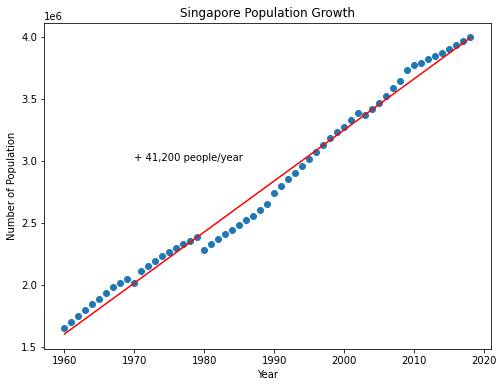

In [17]:
population_pred = all_model.predict(np.array(df.index).reshape((-1,1)))

# Plot the Predictions
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax.annotate('+ 41,200 people/year',xy=(1970,3000000))
plt.scatter(df.index,df["Total"]) 
ax.plot(df.index, population_pred, color = "red")
ax.set_title('Singapore Population Growth')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Population")

plt.show()

### 2. Which Ethnic Group has the highest representation in Singapore?

Sum all the population from each ethnic group.

In [18]:
df.loc[df.index].sum()[:-1].sort_values(ascending=False)

F-Chinese    63112372
M-Chinese    62671373
M-Malay      11702782
F-Malay      11446983
M-Indians     6970639
F-Indians     5866098
F-Other       1668893
M-Other       1558752
dtype: int64

Without even adding the number of male and female from each ethnic groups, we can simply say that the number of population based on ethnic groups is in the following order: `Chinese` > `Malays` > `Indians` > `Others`

### 3. In the last 10 years which ethnic group has shown highest increment in population?

Let's use both dataframe `df` and `df_2` to calculate the difference of population in 2009 and 2018 (10 year) for each ethnic groups.

In [19]:
#Using df
sub_list = []
for x,y in zip(list(df.loc[2018])[:-1],list(df.loc[2009])[:-1]):  #exclude the total column
    sub_list.append(x-y)
    
#We need to add male and female for each ethnic groups
final_list = []
for count in range(0,len(sub_list),2):
    final_list.append(sub_list[count]+sub_list[count+1])
    
print(sub_list)
print(final_list)

[17371, 18402, 85151, 113827, 6367, 10652, 2217, 6420]
[35773, 198978, 17019, 8637]


In [20]:
final_list

[35773, 198978, 17019, 8637]

In [21]:
temp = pd.DataFrame([final_list], columns = ['Malays','Chinese','Indians','Other'])
temp

,Malays,Chinese,Indians,Other
0,35773,198978,17019,8637


Chinese ethnic group shown the highest increment in population in the last 10 years.

In [22]:
#Using df_2
temp = df_2.groupby(['year','ethnic'])['value'].agg('sum')

sub_list = []
for x,y in zip(list(temp.loc[2018]),list(temp.loc[2009])):  #exclude the total column
    sub_list.append(x-y)
    
#NOTE we don't need to add male and female since we have performed groupby earlier

temp = pd.DataFrame([sub_list], columns = ['Chinese','Malays','Indians','Other'])
temp

,Chinese,Malays,Indians,Other
0,198978,17019,35773,8637


In [23]:
#Reminder sample shopee assessment.
# temp = df_2.groupby(['year'])['value'].agg('sum')
# temp = pd.DataFrame(temp)
# temp.reset_index(inplace=True)
# temp['year'].iloc[temp.value.argmax()]

We actually get similar results with the one we did before.

### 4. In which years female population was higher than male population?

For this case we will use `df_2` and **groupby** for easier analysis.

In [24]:
temp = df_2.groupby(['year','gender'])['value'].agg('sum')
temp[:10]

year  gender
1960  Female    786800
      Male      859600
1961  Female    815900
      Male      886500
1962  Female    840700
      Male      909500
1963  Female    865700
      Male      929300
1964  Female    890100
      Male      951500
Name: value, dtype: int64

In [25]:
year_list = []
for year in range(1960,2019):
    if temp.loc[year,'Female'] > temp.loc[year,'Male']:
        year_list.append(year)
print(year_list)
print("count =",len(year_list))

[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
count = 20


It seems that female population started to lead from 1999 onwards.

In [26]:
temp.loc[year_list][:6]

year  gender
1999  Female    1614878
      Male      1614805
2000  Female    1638696
      Male      1634667
2001  Female    1667344
      Male      1658558
Name: value, dtype: int64

### 5. What is the trend of past 10 years in male and female population?

In [27]:
temp = df_2.groupby(['year','gender'])['value'].agg('sum')
temp = pd.DataFrame(temp)
temp.reset_index(inplace=True)
# temp = temp[temp.year>2008]

year_list = temp.year.unique()
y_female = list(temp[temp.gender=="Female"]["value"])
y_male = list(temp[temp.gender=="Male"]["value"])

We need to make a line chart consisting of both `male` and `female` trends against `year`. 

Text(0, 0.5, 'Number of Population')

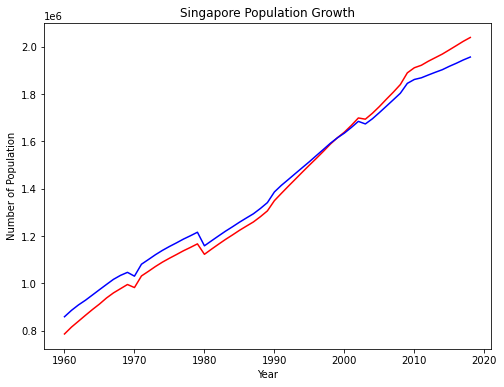

In [28]:
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(year_list,y_female,color="red") 
ax.plot(year_list, y_male, color ="blue")
ax.set_title('Singapore Population Growth')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Population")

### 6. What is the trend of China and India population?

In [29]:
temp = df_2.groupby(['year','ethnic'])['value'].agg('sum')
temp = pd.DataFrame(temp)
temp.reset_index(inplace=True)

year_list = temp.year.unique()
y_china = list(temp[temp.ethnic=="Chinese"]["value"])
y_india = list(temp[temp.ethnic=="Indians"]["value"])

Text(0, 0.5, 'Number of Population')

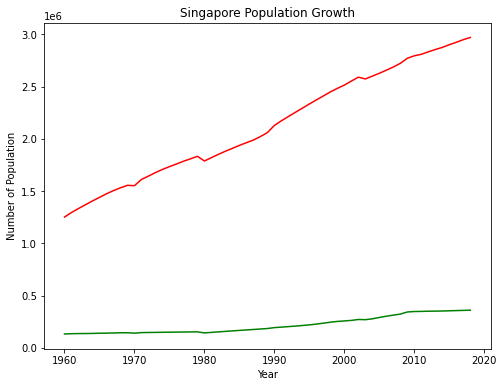

In [30]:
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(year_list,y_china,color="red") 
ax.plot(year_list, y_india, color ="green")
ax.set_title('Singapore Population Growth')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Population")

### 7. What is the average increase in Chinese population?

This question is similar to our first question. Yet we need to obtain the sum of population for both Male and Female Chinese.

In [31]:
#Aggregating dataframe on year and ethnic

temp = df_2.groupby(['year','ethnic'])['value'].agg('sum')
temp = pd.DataFrame(temp)
temp.reset_index(inplace=True)
temp = temp[temp.ethnic == "Chinese"]
temp.head()


,year,ethnic,value
0,1960,Chinese,1251600
4,1961,Chinese,1295000
8,1962,Chinese,1333000
12,1963,Chinese,1369300
16,1964,Chinese,1405500


In [32]:
# We perform linear regression again
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
c_model = LinearRegression()
# Train the Linear Regression model
c_model.fit(np.array(temp.year).reshape((-1,1)), temp.value) #need to reshape index for x array because of having only one variable a.k.a 1D array

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', c_model.intercept_)
print('Coefficients \t: a = ', c_model.coef_)

Intercept 	: b =  -57747489.52285214
Coefficients 	: a =  [30105.28778492]


The Chinese population is growing at an average rate of 30.1k people/year.

### 8. What will be the rate for India?

In [33]:
#Aggregating dataframe on year and ethnic

temp = df_2.groupby(['year','ethnic'])['value'].agg('sum')
temp = pd.DataFrame(temp)
temp.reset_index(inplace=True)
temp = temp[temp.ethnic == "Indians"]
temp.head()

,year,ethnic,value
1,1960,Indians,133200
5,1961,Indians,135700
9,1962,Indians,137100
13,1963,Indians,137400
17,1964,Indians,138400


In [34]:
# We perform linear regression again
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
i_model = LinearRegression()
# Train the Linear Regression model
i_model.fit(np.array(temp.year).reshape((-1,1)), temp.value) #need to reshape index for x array because of having only one variable a.k.a 1D array

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', i_model.intercept_)
print('Coefficients \t: a = ', i_model.coef_)

Intercept 	: b =  -8575273.257568674
Coefficients 	: a =  [4420.73658679]


Rate of Indians = 4420 people/year. The Chinese population grew up to 7x faster than Indians

### 9. What will be the population of Singapore in 2019?
We simply do a linear regression since the growth resembles a linear growth. Since we have created a `all_model` previously, we are just going to use that.

In [35]:
round(all_model.predict(np.array(2019).reshape(-1,1))[0])

4032581

In [36]:
df.tail(1)

,M-Malay,F-Malay,M-Chinese,F-Chinese,M-Indians,F-Indians,M-Other,F-Other,Total
Year,,,,,,,,,
2018,266486,269338,1445375,1523906,184496,176032,59481,69169,3994283


### 10. What will be the Chinese population in SG in 2019?

In [37]:
round(c_model.predict(np.array(2019).reshape(-1,1))[0])

3035087

### 11. What will be the Indian population in SG in 2019?

In [38]:
round(i_model.predict(np.array(2019).reshape(-1,1))[0])

350194

### 12. What will be the Male population in SG in 2019?

In [39]:
#Aggregating dataframe on year and gender

temp = df_2.groupby(['year','gender'])['value'].agg('sum')
temp = pd.DataFrame(temp)
temp.reset_index(inplace=True)
temp = temp[temp.gender == "Male"]
temp.head()


,year,gender,value
1,1960,Male,859600
3,1961,Male,886500
5,1962,Male,909500
7,1963,Male,929300
9,1964,Male,951500


In [40]:
# We perform linear regression again
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
male_model = LinearRegression()
# Train the Linear Regression model
male_model.fit(np.array(temp.year).reshape((-1,1)), temp.value) #need to reshape index for x array because of having only one variable a.k.a 1D array

# Coefficients of the Linear Regression line
print('Coefficients \t: a = ', male_model.coef_)

Coefficients 	: a =  [19356.03927528]


In [41]:
round(male_model.predict(np.array(2019).reshape(-1,1))[0])

1985826

In [42]:
temp.tail()

,year,gender,value
109,2014,Male,1902410
111,2015,Male,1916628
113,2016,Male,1929526
115,2017,Male,1943545
117,2018,Male,1955838


Male population will increase from 1.955 mil to 1.985 mil based on the linear model. Note that the difference is greater than the gradient a which equals to 19.3k per year simply because the model is an approximation. 

### 13. What will be the Female population in SG in 2019?

In [43]:
#Aggregating dataframe on year and gender
temp = df_2.groupby(['year','gender'])['value'].agg('sum')
temp = pd.DataFrame(temp)
temp.reset_index(inplace=True)
temp = temp[temp.gender == "Female"]

female_model = LinearRegression()
# Train the Linear Regression model
female_model.fit(np.array(temp.year).reshape((-1,1)), temp.value) #need to reshape index for x array because of having only one variable a.k.a 1D array

print("The estimated female population in 2019 will be",round(female_model.predict(np.array(2019).reshape(-1,1))[0]))

The estimated female population in 2019 will be 2046755


### 14. When will Singapore population reach 5 million?
Take note that the dataset used does not represent the true Singapore population numbers.

To solve this we need to get the population equation. Basic form of linear eq: y = mx + c, where y is the `population number`, m is `coefficient`, x is the `year`, and c is the `intercept`.

So now solve for x! x = (y-c)/m

In [44]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', all_model.intercept_)
print('Coefficients \t: a = ', all_model.coef_[0])

Intercept 	: b =  -79150662.53483345
Coefficients 	: a =  41200.21969608417


In [45]:
x = (5000000 - all_model.intercept_) / all_model.coef_[0]
m = (x-round(x))*12

print(f'The Singapore population will reach 5 mil in {round(x)} Month {round(m)}')

The Singapore population will reach 5 mil in 2042 Month 6


### The End